In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget http://mirror.its.dal.ca/apache/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xvf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark

--2021-02-01 15:39:20--  http://mirror.its.dal.ca/apache/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
Resolving mirror.its.dal.ca (mirror.its.dal.ca)... 192.75.96.254, 2001:410:a000:50::20
Connecting to mirror.its.dal.ca (mirror.its.dal.ca)|192.75.96.254|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-02-01 15:39:20 ERROR 404: Not Found.

tar: spark-2.4.0-bin-hadoop2.7.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
file_loc = '/content/training_data_assignment.csv'



In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
df = spark.read.csv(file_loc, inferSchema=True, header =True)


In [ ]:
print (type(df))


<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
df.printSchema()


root
 |-- vfactor: string (nullable = true)
 |-- idx: integer (nullable = true)
 |-- seq: string (nullable = true)



In [ ]:
df.show()


+-------+---+--------------------+
|vfactor|idx|                 seq|
+-------+---+--------------------+
|      V|149|MKQFLDFLPLVVFFAFY...|
|      V|150|MEKYFGEKQERFSFRKL...|
|      V|151|MHPNYYLSPLAVAIALG...|
|      V|152|MKMRLVAAAAMGLAMST...|
|      V|153|MKNIILSTLVITTSVLV...|
|      V|155|MDSIHGHYHIQLSNYSA...|
|      V|156|MKKVQRQMKWLFLAASI...|
|      V|157|MKIHIVQKGDTLWKIAK...|
|      V|158|MKISSFISTSLPLPTSV...|
|      V|159|MMNLSLSDLHRQVSRLV...|
|      V|160|MSALITHDRSTPVTGSL...|
|      V|161|MRKKQKLPFDKLAIALM...|
|      V|162|MNRIYSLRYSAVARGFI...|
|      V|163|MDFLINKKLKIFITLME...|
|      V|164|MNNRMLSFPSMLFLLAF...|
|      N|165|MSAVALPRVSGGHDEHG...|
|      V|165|MNKIYYLKYCHITKSLI...|
|      N|166|MTHTVPQNMKAAVMHNT...|
|      V|166|MSNVRHHEGSVTIEISN...|
|      N|167|MAIPAFGLGTFRLKDDV...|
+-------+---+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('/content/training_data_assignment.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- vfactor: string (nullable = true)
 |-- idx: integer (nullable = true)
 |-- seq: string (nullable = true)



In [ ]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns)

,vfactor,idx,seq
0,V,149,MKQFLDFLPLVVFFAFYKIYDIYAATAALIVATAIVLIYSWVRFRK...
1,V,150,MEKYFGEKQERFSFRKLSVGLVSATISSLFFMSVLASSSVDAQETA...
2,V,151,MHPNYYLSPLAVAIALGIASPVKAADPIPLQKSSFSEVTQKFQLTL...
3,V,152,MKMRLVAAAAMGLAMSTTIAATATTDATTSAPGTSLTTDTEKLSYS...
4,V,153,MKNIILSTLVITTSVLVVNVAQADTNAFSVGYAQSKVQDFKNIRGV...


In [ ]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
vfactor,V,V,V,V,V
idx,149,150,151,152,153
seq,MKQFLDFLPLVVFFAFYKIYDIYAATAALIVATAIVLIYSWVRFRK...,MEKYFGEKQERFSFRKLSVGLVSATISSLFFMSVLASSSVDAQETA...,MHPNYYLSPLAVAIALGIASPVKAADPIPLQKSSFSEVTQKFQLTL...,MKMRLVAAAAMGLAMSTTIAATATTDATTSAPGTSLTTDTEKLSYS...,MKNIILSTLVITTSVLVVNVAQADTNAFSVGYAQSKVQDFKNIRGV...


In [ ]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
idx,2055,700.10900243309,328.9917630097516,149,1385


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix




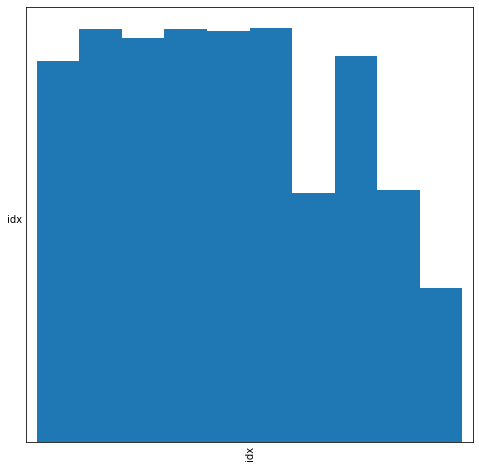

In [ ]:
numeric_data = df.select(numeric_features).toPandas()
axs = scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, RepeatedStratifiedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [ 1  2  3  4  5  7  8  9 10 11 12 14 15 17 18 19 20 21 22 23 24 25 26 27
 29 30 31 32 33 34 35 36 37 39 40 41 42 43 45 48 51 52 53 54 55 56 57 58
 59 61 62 63 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 85 86 87
 88 89 91 93 94 95 97 98] Validation: [ 0  6 13 16 28 38 44 46 47 49 50 60 64 82 83 84 90 92 96 99]
Train: [ 0  1  2  3  4  6  7  8  9 10 12 13 16 17 18 19 20 21 22 24 25 26 27 28
 29 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 64 65 66 69 70 73 74 77 78 79 82 83 84 85 87 89 90 91
 92 93 94 95 96 97 98 99] Validation: [ 5 11 14 15 23 30 31 39 48 63 67 68 71 72 75 76 80 81 86 88]
Train: [ 0  1  2  4  5  6  7  8 11 12 13 14 15 16 17 18 19 22 23 25 26 27 28 30
 31 33 36 38 39 41 42 44 46 47 48 49 50 52 53 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 86 87 88
 89 90 91 92 94 95 96 99] Validation: [ 3  9 10 20 21 24 29 32 34 35 37 40 43 45 51 54 85 93 97 98]
Train: [ 0  1  3  5  6

In [ ]:
from sklearn import metrics


In [ ]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='hinge', penalty='elasticnet',  fit_intercept=True)
scorer = metrics.accuracy_score
results = []
n_splits = 5
kf = KFold(n_splits=n_splits)
for train_index, test_index in kf.split(X, y):
    x_train, y_train = X[train_index], y[train_index]
    x_test, y_test = X[test_index], y[test_index]
    classifier.fit(x_train, y_train)
    results.append(scorer(y_test, classifier.predict(x_test)))
print ('KFold')
print('mean = ', np.mean(results))
print('std = ', np.std(results))
print()

KFold
mean =  0.74
std =  0.11575836902790225



In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              